# I) Open libraries OCR

# **a) EasyOCR**

In [44]:
import easyocr
import PIL
from PIL import ImageDraw

In [45]:
reader = easyocr.Reader(['ru'], gpu = True)

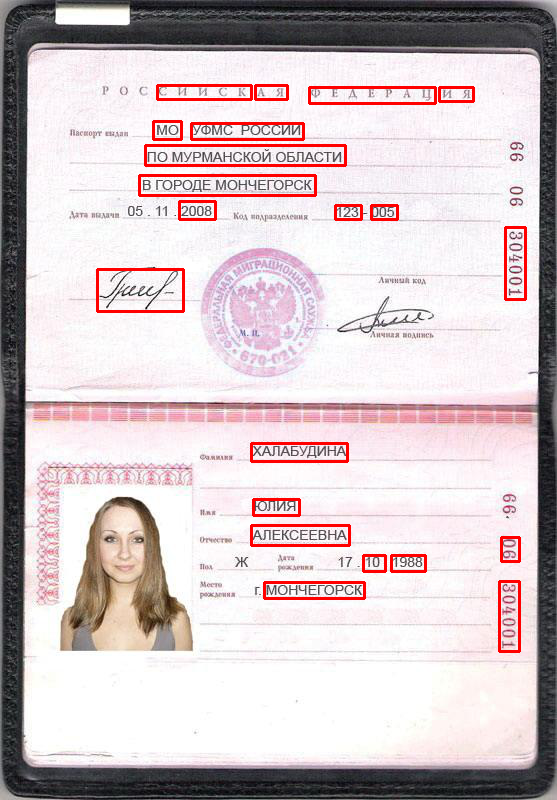

In [46]:
im = PIL.Image.open("/content/DATA/1.jpeg")
bounds = reader.readtext('/content/DATA/1.jpeg')

def draw_boxes(image, bounds, color='red', width=3):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

# b) Pytesseract

In [12]:
import  pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata" -l rus --oem 1 --psm 3'
result = pytesseract.image_to_string('C:\\Users\\User\\Desktop\\DataForOCR\\DataForOCR\\2.jpeg', config=config)

print(result)

Ссийскля ФЕДЕРАЦИЯ
ОТДЕЛОМ ВНУТРЕННИХ ДЕЛ
ГОР. КРАСНОЗНАМЕНСК

16.10.2016 100-128

дтн

васаЕ
ШАПОШНИКОВА ®

ВИКТОРИЯ _

НИКОЛАЕВНА.
14.09.1985
КРАСНОЗНАМЕНСК

311166 90 9

<<<Пробная страничка Паспорт РФ 2017>>>

<<<Стоимость программы 10 $>>>
<<<Етаз1: Васкек1аБпем@ дта+1. сош>>>>




# II) OCR with using API (ocr.space)

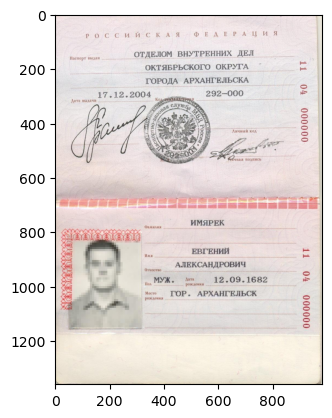

P OC
Ilacnop•r BOAaH
CMÅCKA%ÄbEAEPAIJV151
OTÅEJOM BHYTPEHHHX
OKTf1BPbCK01'O OKPYPA
I'OPOÅA APXAHrEJ1bCKA
17.12.2004
292-000
80S
5
HMflPEK
(Dam
EBITEHMM
Lbs g
AJIEKCAHÅPOBHY
OTyeeTB0
pox neuuu
12.09.1682
pop. APXAHrEJ1bCK
M eero



In [6]:
import io
import cv2
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


url_api = "https://api.ocr.space/parse/image"

img = mpimg.imread('C:\\Users\\User\\Desktop\\DataForOCR\\DataForOCR\\7.jpeg')
imgplot = plt.imshow(img)
plt.show()

_ , compimg = cv2.imencode(".jpg",img,[1,90])
file_bytes = io.BytesIO(compimg)
     
result = requests.post(url_api,files={"/content/DATA/7.jpeg" : file_bytes},data={"apikey":"e647b4847d88957"})
result = result.content.decode()
result = json.loads(result)
     
text = result.get('ParsedResults')[0].get('ParsedText')
     
print(text)